In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
print(len(data))

48204


# Feature Engineering 

In [51]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)

In [52]:
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

In [53]:
X.head()

,year,month,weekday,hour,isholiday
0,2012,10,1,9,1.0
1,2012,10,1,10,1.0
2,2012,10,1,11,1.0
3,2012,10,1,12,1.0
4,2012,10,1,13,1.0


### Split dataset

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=49, shuffle=False)

In [67]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
y_pred = model.predict(X_test)

In [69]:
print(r2_score(list(y_test), list(y_pred)))

0.9109384431275062


## Visualizing 

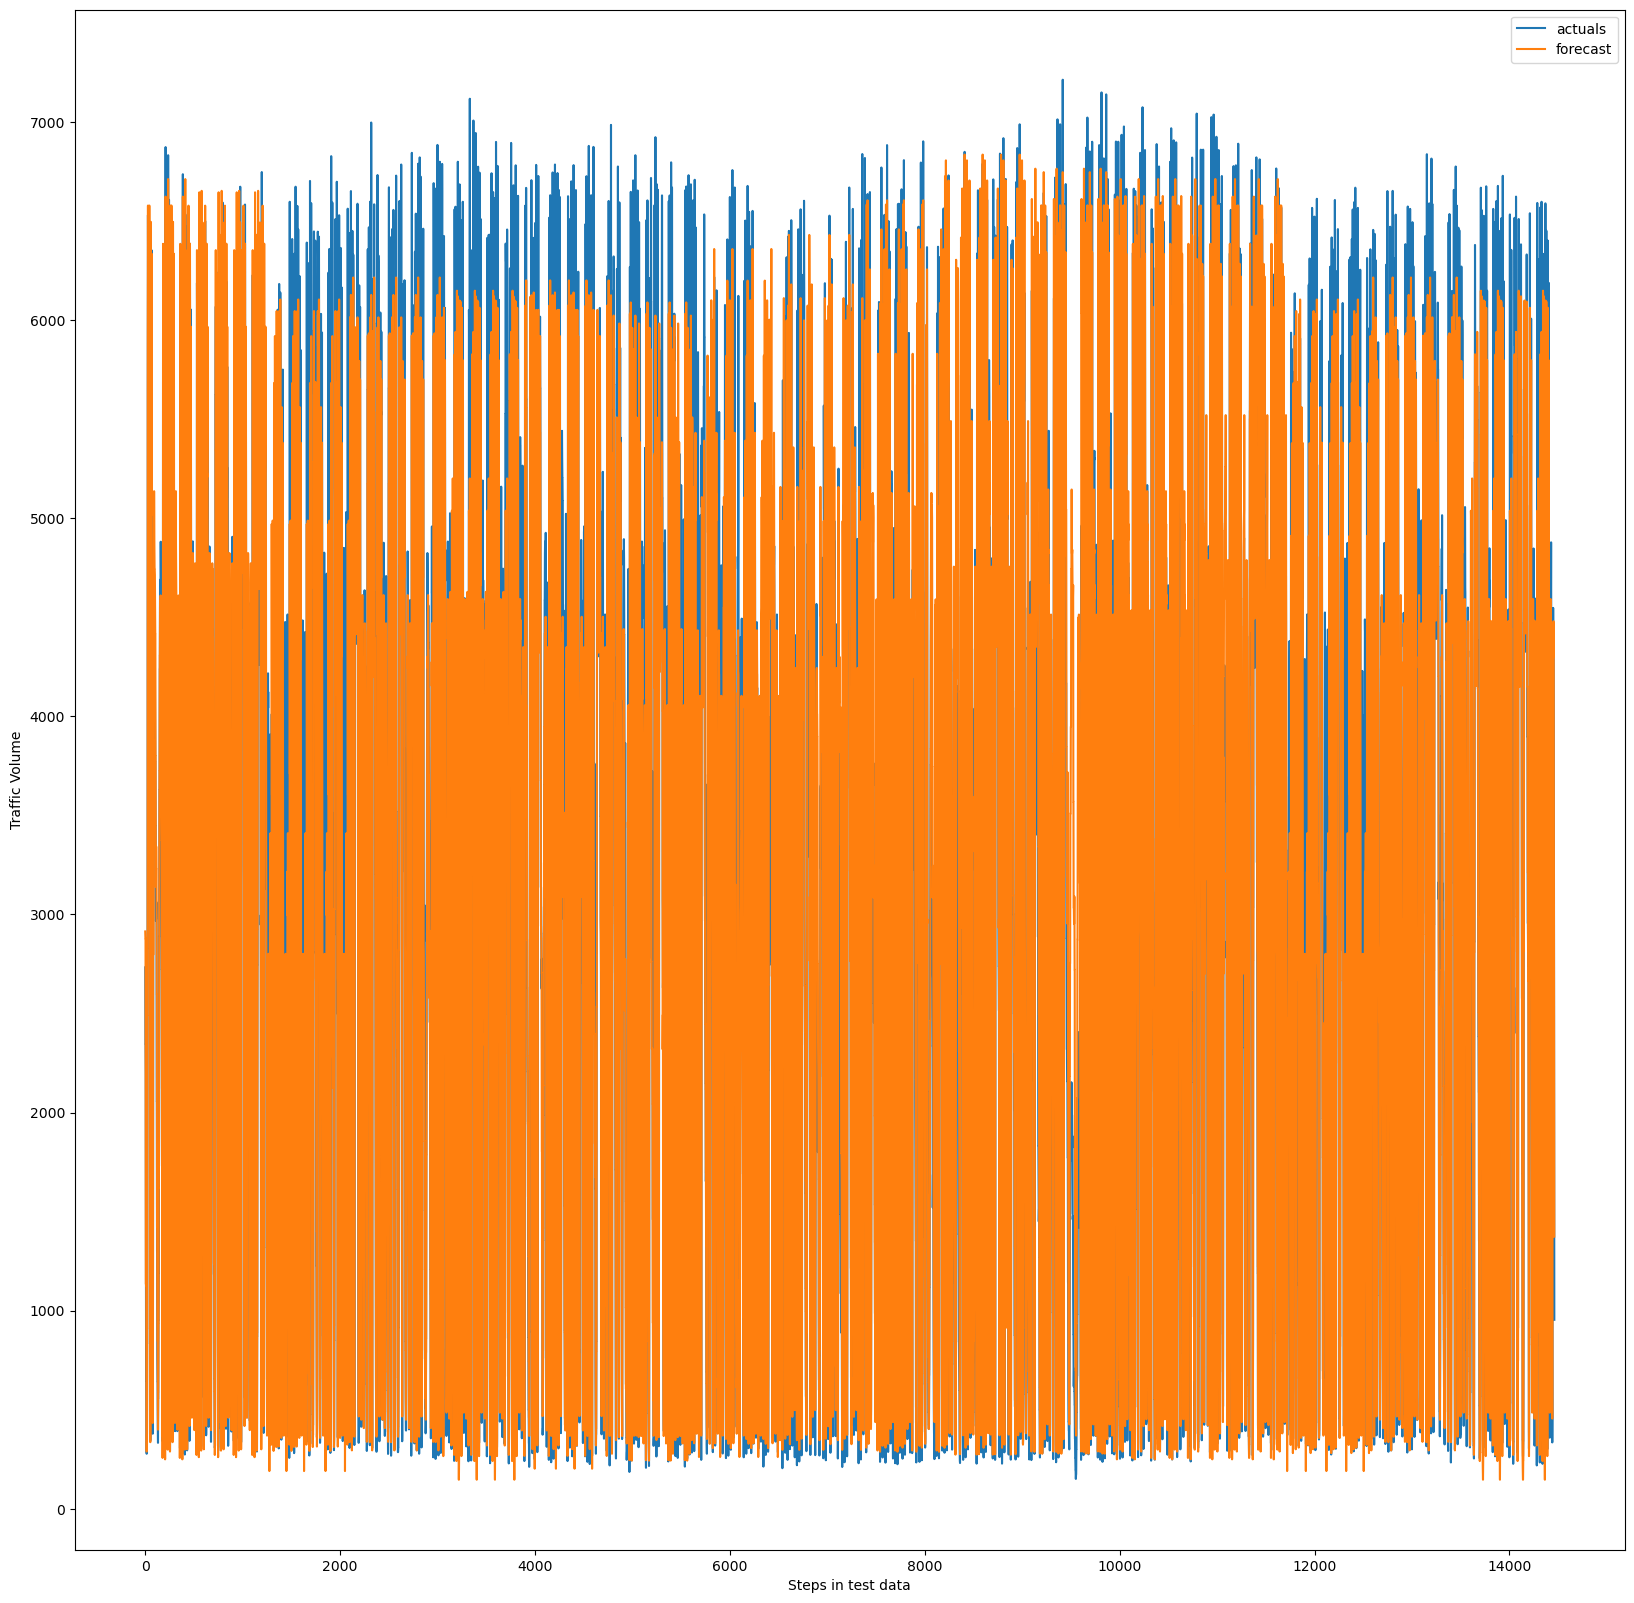

In [41]:
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(y_pred))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


In [58]:
my_knn = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


0.91283416490001
KNeighborsRegressor(n_neighbors=6)


In [59]:

my_knn = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=10, n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)

0.91283416490001
KNeighborsRegressor(n_neighbors=6)


In [48]:
mse = mean_squared_error(list(y_test), list(y_pred))
rmse = sqrt(mse)
rmse

597.9681207874551